In [2]:
import torch
from torch import nn
from d2l import torch as d2l

In [3]:
class Reshape(nn.Module):
    def forward(self, x):
        return x.view(-1, 1, 28, 28)

In [4]:
Lenet = nn.Sequential(
    Reshape(),
    nn.Conv2d(1, 6, kernel_size=5, padding=2),
    nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5),
    nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120),
    nn.Sigmoid(),
    nn.Linear(120, 84),
    nn.Sigmoid(),
    nn.Linear(84, 10)
)

In [5]:
X = torch.rand((1, 1, 28, 28), dtype=torch.float32)
for layer in Lenet:
    X = layer(X)
    print(layer.__class__.__name__, 'Output shape: \t', X.shape)

Reshape Output shape: 	 torch.Size([1, 1, 28, 28])
Conv2d Output shape: 	 torch.Size([1, 6, 28, 28])
Sigmoid Output shape: 	 torch.Size([1, 6, 28, 28])
AvgPool2d Output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d Output shape: 	 torch.Size([1, 16, 10, 10])
Sigmoid Output shape: 	 torch.Size([1, 16, 10, 10])
AvgPool2d Output shape: 	 torch.Size([1, 16, 5, 5])
Flatten Output shape: 	 torch.Size([1, 400])
Linear Output shape: 	 torch.Size([1, 120])
Sigmoid Output shape: 	 torch.Size([1, 120])
Linear Output shape: 	 torch.Size([1, 84])
Sigmoid Output shape: 	 torch.Size([1, 84])
Linear Output shape: 	 torch.Size([1, 10])


In [6]:
def evaluate_accuracy_gpu(net, data_iter, device=None):
    if isinstance(net, torch.nn.Module):
        net.eval()
        if not device:
            device = next(iter(net.parameters())).device
    metric = d2l.Accumulator(2)
    for X, y in data_iter:
        if isinstance(X, list):
            X = [x.to(device) for x in X]
        else:
            X = X.to(device)
        y = y.to(device)
        metric.add(d2l.accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [8]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
print(len(train_iter), len(test_iter))

469 79


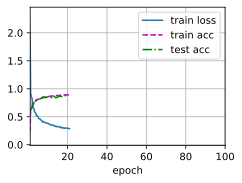

In [ ]:
lr, num_epochs = 0.1, 10
d2l.train_ch6(Lenet, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())